In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display

In [343]:
house_df = pd.read_csv("Housing.csv")

In [344]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [345]:
missing_values = house_df.isnull().sum()

missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


In [346]:
house_df.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

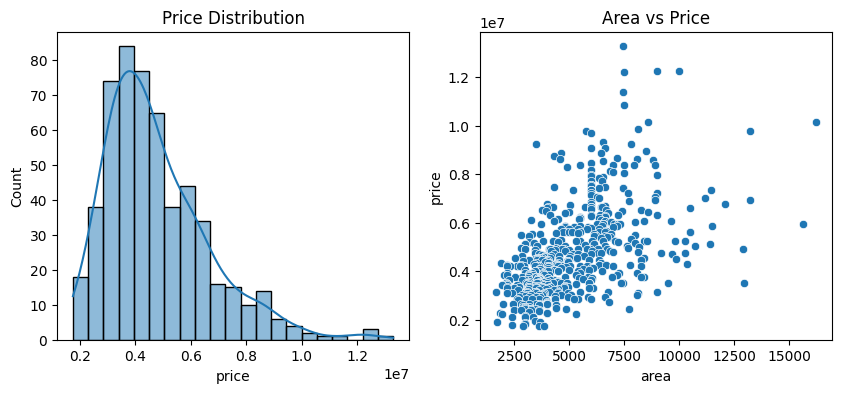

In [347]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(house_df['price'], kde=True)
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.scatterplot(x='area', y='price', data=house_df)
plt.title('Area vs Price')
plt.show()

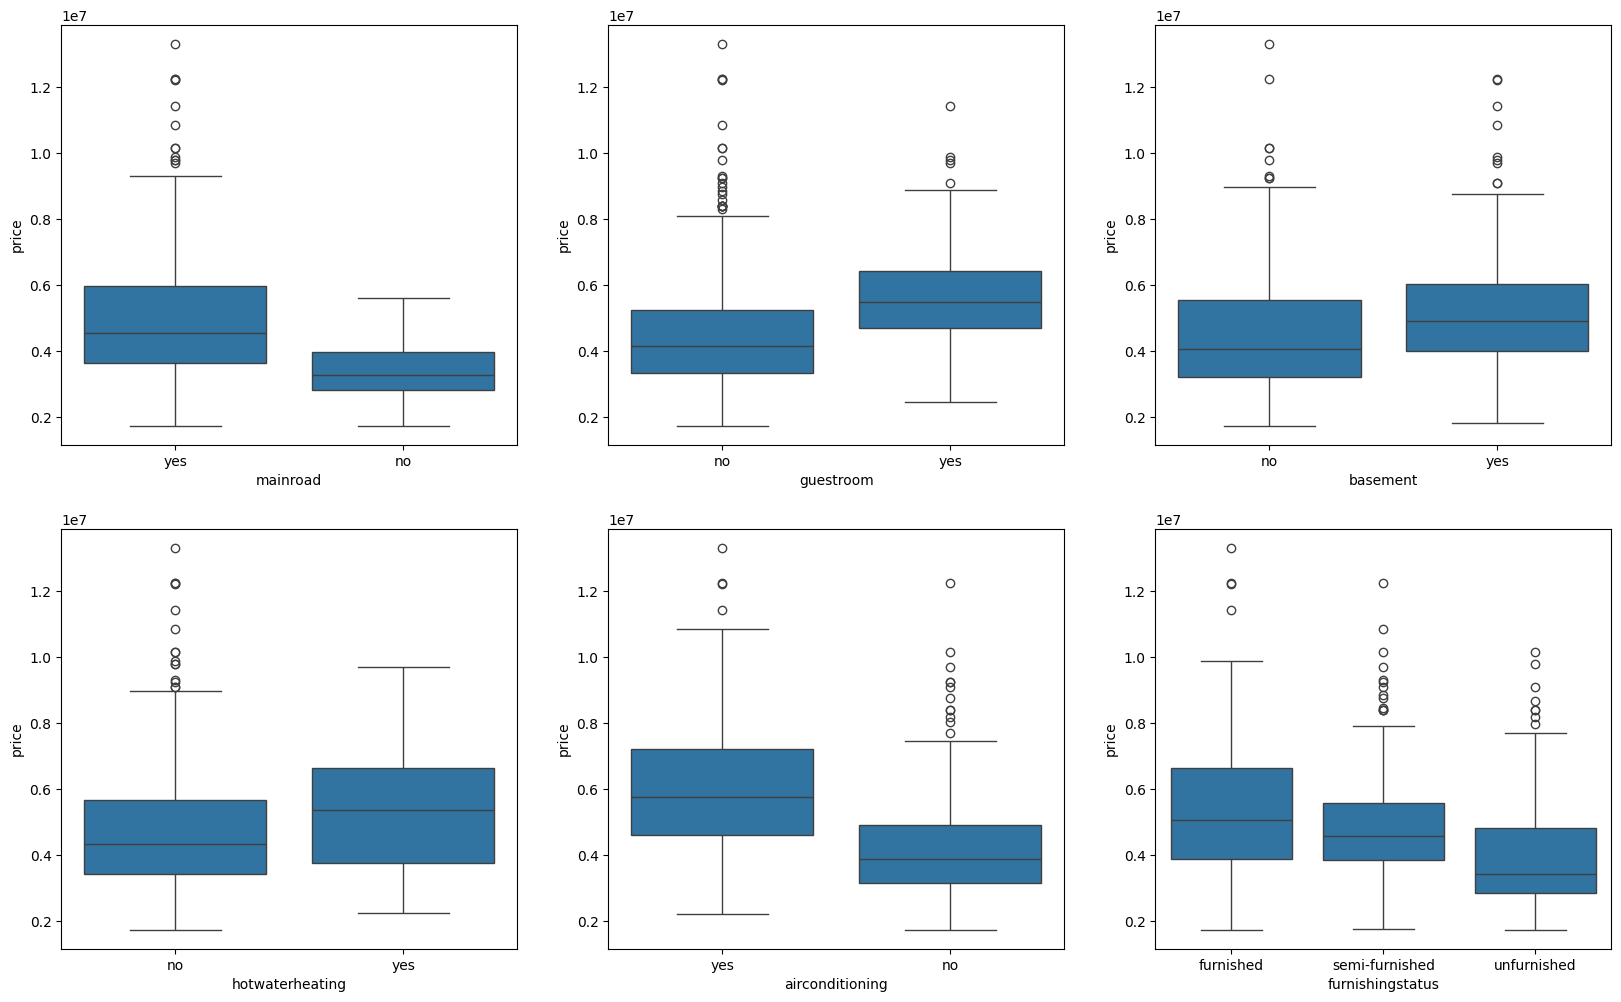

In [348]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house_df)
plt.show()

In [349]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

house_df[varlist] = house_df[varlist].apply(binary_map)

In [350]:
status = pd.get_dummies(house_df['furnishingstatus'], drop_first = True)
X = pd.concat([house_df, status], axis = 1)

In [351]:
X.drop('furnishingstatus', axis = 1, inplace = True)


In [352]:
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [353]:
corr = X.corr()

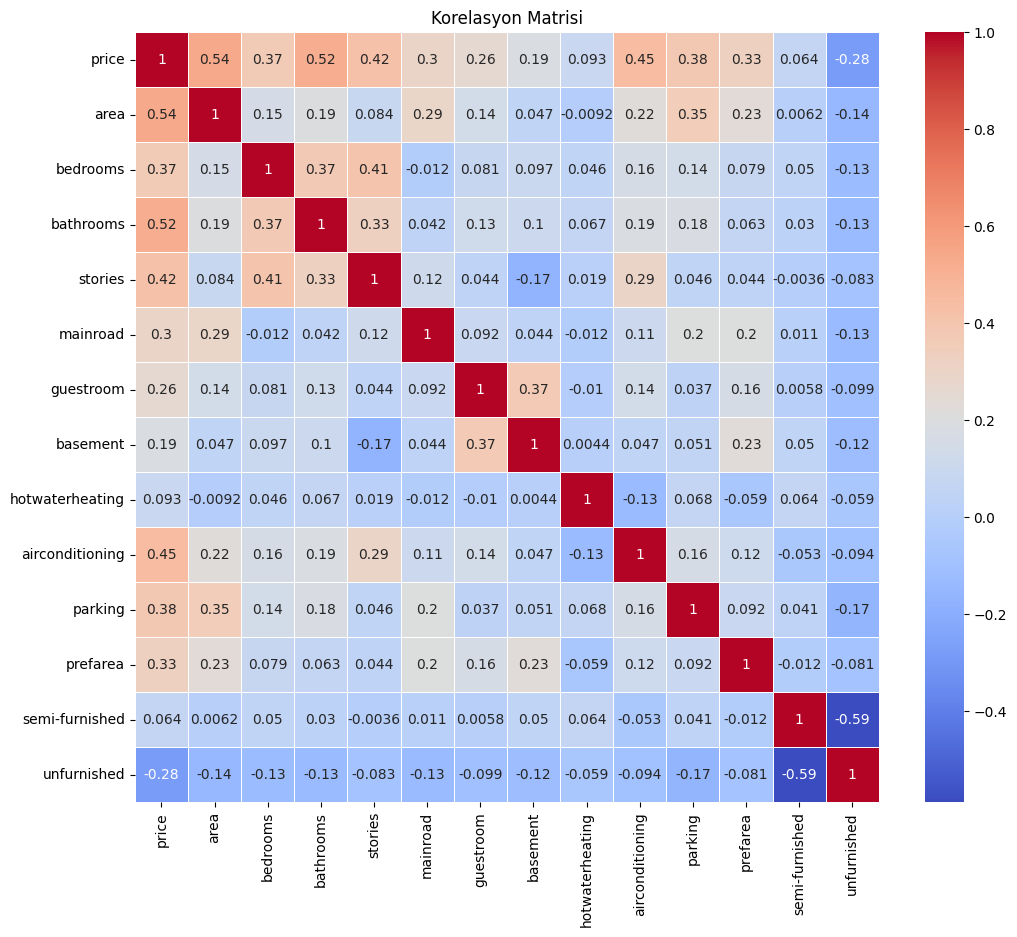

In [354]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [355]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [356]:
features = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','airconditioning','parking','prefarea','unfurnished','semi-furnished','hotwaterheating']

target = "price"

In [357]:
model_names = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor()]
model_save_path = 'model'
scaler_save_path = 'scaler.joblib'

In [358]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [359]:
def train_and_evaluate_models(model_names, model_save_path, scaler_save_path):
    y = X['price']
    X1 = X.drop('price', axis=1)
    #X1 = X[features]
    
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=22)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    joblib.dump(scaler, scaler_save_path)

    selected_models = {model.__class__.__name__: model for model in model_names}

    results = {}
    for model_name, model in selected_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {
            "Mean Squared Error": mse,
            "R^2 Score": r2,
            "Predictions": list(y_pred),
            "Actual Values": list(y_test)
        }
        joblib.dump(model, f"{model_save_path}_{model_name}.joblib")

    return results

In [360]:
#model_results = train_and_evaluate_models(features, model_names)
model_results = train_and_evaluate_models(model_names, model_save_path, scaler_save_path)

with open("Housing_results.txt", "w") as f:
    for model_name, metrics in model_results.items():
        f.write(f"Model: {model_name}\n")
        f.write(f"Mean Squared Error: {metrics['Mean Squared Error']:.4f}\n")
        f.write(f"R^2 Score: {metrics['R^2 Score']:.4f}\n")
        f.write("\n\n")

with open("Housing_PriceResults.txt", "w") as f:
    for model_name, metrics in model_results.items():
        f.write(f"Model: {model_name}\n")
        f.write("Predictions vs Actual Values:\n")
        for pred, actual in zip(metrics["Predictions"], metrics["Actual Values"]):
            f.write(f"Predicted: {pred:.4f}, Actual: {actual:.4f}\n")
        f.write("\n\n")

In [361]:
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [362]:
def predict_house_price(house_data, model, scaler):
    feature_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished']
    house_features = house_data[feature_names]
        
    house_features_scaled = scaler.transform(house_features)
    predicted_price = model.predict(house_features_scaled)
        
    return predicted_price[0]

In [363]:
def get_user_input():
    house_data = {}
    
    fields = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished']
    
    print("Enter home information. Press 'q' to exit.")
    
    for field in fields:
        while True:
            value = input(f"{field}: ")
            if value.lower() == 'q':
                return None
            try:
                house_data[field] = int(value)
                break
            except ValueError:
                print("Please enter a valid number or press 'q' to exit.")
    
    return house_data

In [367]:
user_data = get_user_input()
if user_data is not None:
    house_data = pd.DataFrame([user_data])
    display(house_data)
else:
    house_data = None
    print("The program has been terminated.")

Enter home information. Press 'q' to exit.


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,1,0,0,1,2,2,0,0


In [368]:
if house_data is not None:
    model = joblib.load("model_RandomForestRegressor.joblib")
    scaler = joblib.load("scaler.joblib")

    predicted_price = predict_house_price(house_data, model, scaler)
if predicted_price is not None:
    print(f"Estimated house price: {predicted_price}")
else:
    print("Prediction could not be completed due to an error.")

Estimated house price: 11095980.0
